In [5]:
%pip install matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

In [10]:
boost_end_time = 0.3
burnout_time = 1.7
maximum_boost_thrust = 30
average_thrust = 10
gravitational_acceleration = 9.8
engine_number = 1
rocket_mass = 0.5

In [17]:
def v(t):
    if t < boost_end_time:
        return ((maximum_boost_thrust * engine_number / boost_end_time) * t**2 / (2 * rocket_mass)) - gravitational_acceleration * t
    elif t < burnout_time:
        return (average_thrust * engine_number / rocket_mass) * t - gravitational_acceleration * t - (average_thrust * engine_number / rocket_mass) * boost_end_time + ((maximum_boost_thrust * engine_number / boost_end_time) / (2 * rocket_mass)) * boost_end_time ** 2
    else:
        return max(- gravitational_acceleration * t + average_thrust * engine_number * burnout_time / rocket_mass - average_thrust * engine_number * boost_end_time / rocket_mass + (maximum_boost_thrust * engine_number / boost_end_time) * boost_end_time ** 2 / (2 * rocket_mass), 0)

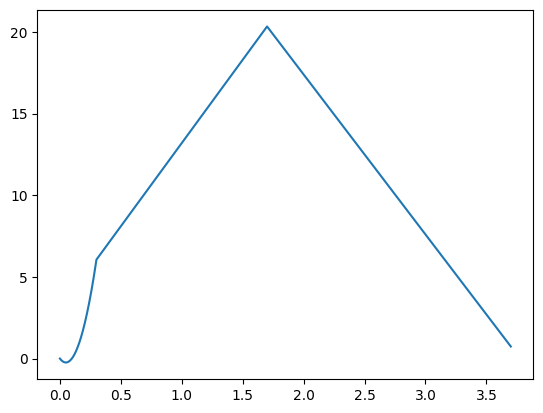

In [19]:
x_values = np.linspace(0, burnout_time + 2, 1000)
y_values = [v(x) for x in x_values]
plt.plot(x_values, y_values)